In [18]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
Train = pd.read_csv("Train_merged.csv")

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19731 entries, 0 to 19730
Data columns (total 51 columns):
Unnamed: 0               19731 non-null int64
Agreement_ID             19731 non-null int64
Foreclosure              19731 non-null int64
Customer_ID              19731 non-null int64
MOB                      19731 non-null int64
Loan_Amt                 19731 non-null object
NET_DISBURSED_AMT        19731 non-null object
Interest_Start_Date      19731 non-null object
Current_ROI              19731 non-null float64
Original_ROI             19731 non-null float64
Current_Tenure           19731 non-null float64
Original_Tenure          19731 non-null int64
Due_Day                  19731 non-null int64
Authorization_Date       19731 non-null object
City                     19731 non-null object
Pre_EMI_Due_Amt          19731 non-null float64
Pre_EMI_Received_Amt     19731 non-null float64
PRE_EMI_OS_AMOUNT        19731 non-null float64
EMI_Due_Amt              19731 non-null float6

In [21]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = Train.select_dtypes(include=['object'])
df_categorical.head()

,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Authorization_Date,City,Last_Receipt_Date,Product,NPA_In_Last_Month,NPA_In_Current_Month,Gender,Marital_Status,Qualification
0,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,29-Aug-10,MUMBAI,05-May-14,HL,NaN,NaN,M,M,POSTGRAD
1,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,15-Sep-10,MUMBAI,01-Nov-13,HL,NaN,NaN,M,M,POSTGRAD
2,"39,33,395.00","39,33,395.00",01-Nov-10,02-Nov-10,MUMBAI,05-Aug-17,HL,NaN,NaN,M,M,GRAD
3,"1,00,22,587.71","1,00,22,587.71",06-Oct-10,06-Oct-10,THANE,02-May-18,HL,NaN,NaN,M,M,POSTGRAD
4,"77,55,937.31","77,55,937.31",26-Oct-10,26-Oct-10,MUMBAI,05-Apr-18,HL,NaN,NaN,M,M,UG


In [22]:
TrainX_merged = pd.read_csv("TrainX_merged.csv")

In [23]:
df_categorical = df_categorical[['City','Product','Gender','Marital_Status','Qualification']]

In [24]:
df_categorical.Gender = df_categorical.Gender.astype('str')

In [25]:
df_categorical.Marital_Status = df_categorical.Marital_Status.astype('str')

In [26]:
df_categorical.Qualification = df_categorical.Qualification.astype('str')

In [27]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,City,Product,Gender,Marital_Status,Qualification
0,145,0,1,0,5
1,145,0,1,0,5
2,145,0,1,0,2
3,222,0,1,0,5
4,145,0,1,0,7


In [155]:
Train_data = pd.concat([TrainX_merged, df_categorical],axis = 1)

In [156]:
Train_data = Train_data.iloc[:,1:]

In [157]:
Train_Amt_DF = Train.loc[:,['Pre_EMI_Due_Amt','Pre_EMI_Received_Amt','PRE_EMI_OS_AMOUNT','EMI_Due_Amt',
                          'EMI_Received_Amt' ,'EMI_OS_AMOUNT','Excess_Available',
                            'Excess_Adjusted_Amt','Balance_Excess','Net_Receivable','Outstanding_Principal'
                            ,'Paid_Principal','Paid_Interest','Month_Opening']]

In [158]:
Train_Amt_DF = round(Train_Amt_DF/100000,0)

In [159]:
Train_data = pd.concat([Train_data,Train_Amt_DF],axis = 1)

In [160]:
Train_Numeric = Train.loc[:,['DPD','FOIR','No_Of_Dependent'
                            ,'Pre_Job_Years']]  

In [161]:
Train_data = pd.concat([Train_data,Train_Numeric],axis = 1)

In [162]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19731 entries, 0 to 19730
Data columns (total 29 columns):
Net_Disbursed_Amt        19731 non-null float64
ROI_Change_Ratio         19731 non-null float64
Tenure_Ratio             19731 non-null float64
Tenure_Change_Ratio      19731 non-null float64
Foreclosure              19731 non-null int64
Net_LTV                  19731 non-null float64
City                     19731 non-null int32
Product                  19731 non-null int32
Gender                   19731 non-null int32
Marital_Status           19731 non-null int32
Qualification            19731 non-null int32
Pre_EMI_Due_Amt          19731 non-null float64
Pre_EMI_Received_Amt     19731 non-null float64
PRE_EMI_OS_AMOUNT        19731 non-null float64
EMI_Due_Amt              19731 non-null float64
EMI_Received_Amt         19731 non-null float64
EMI_OS_AMOUNT            19731 non-null float64
Excess_Available         19731 non-null float64
Excess_Adjusted_Amt      19731 non-null

In [163]:
Train_data[['No_Of_Dependent','Pre_Job_Years']].describe()

,No_Of_Dependent,Pre_Job_Years
count,5949.000000,1407.000000
mean,0.522609,4.607676
std,1.102681,6.443729
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,2.000000
75%,0.000000,7.000000
max,10.000000,37.000000


In [164]:
Train_data['No_Of_Dependent'] = Train_data['No_Of_Dependent'].fillna(-1)

In [165]:
Train_data['Pre_Job_Years'] = Train_data['Pre_Job_Years'].fillna(-1)

In [166]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [167]:
# Putting feature variable to X
X = Train_data.drop(['Foreclosure'],axis=1)

# Putting response variable to y
y = Train_data['Foreclosure']

In [168]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Net_LTV,City,Product,Gender,Marital_Status,Qualification,...,Balance_Excess,Net_Receivable,Outstanding_Principal,Paid_Principal,Paid_Interest,Month_Opening,DPD,FOIR,No_Of_Dependent,Pre_Job_Years
16257,13.51,-0.10,0.02,-0.17,37.83,261,1,2,2,8,...,0.0,0.0,13.0,0.0,1.0,13.0,0.0,0.57,-1.0,-1.0
7515,30.03,0.00,0.10,0.00,70.92,90,2,1,1,7,...,0.0,0.0,29.0,1.0,7.0,29.0,0.0,0.30,0.0,-1.0
1993,23.87,0.00,0.05,0.00,54.12,90,2,0,0,5,...,0.0,0.0,23.0,0.0,3.0,23.0,0.0,0.49,0.0,-1.0
2239,27.58,-0.04,0.22,-0.03,73.06,2,0,1,0,7,...,0.0,0.0,25.0,3.0,13.0,25.0,0.0,0.49,2.0,-1.0
16897,15.51,0.00,0.03,0.00,85.15,247,2,2,2,8,...,0.0,0.0,15.0,0.0,1.0,15.0,0.0,0.34,-1.0,-1.0


In [169]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [170]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5354
           1       0.65      0.57      0.61       566

   micro avg       0.93      0.93      0.93      5920
   macro avg       0.80      0.77      0.78      5920
weighted avg       0.93      0.93      0.93      5920



In [171]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[5179  175]
 [ 242  324]]
0.9295608108108108


In [174]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="precision")
tree.fit(X_train, y_train)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='precision',
       verbose=0)

In [175]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.015842,0.005423,0.000000,0.000000,1,{'max_depth': 1},39,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001609,0.006326,0.000000,0.000000
1,0.025674,0.002206,0.650152,0.644450,2,{'max_depth': 2},13,0.593407,0.660504,0.625767,...,0.629870,0.647343,0.745902,0.624809,0.655844,0.640902,0.004150,0.000401,0.051821,0.011683
2,0.029484,0.001797,0.831466,0.842511,3,{'max_depth': 3},1,0.593407,0.660504,0.885246,...,0.828125,0.843658,0.958333,0.893281,0.892308,0.906780,0.002057,0.000405,0.126006,0.093988
3,0.036294,0.002214,0.684330,0.708426,4,{'max_depth': 4},9,0.675824,0.709576,0.635802,...,0.695946,0.723869,0.751592,0.672293,0.662500,0.715210,0.001319,0.000980,0.038892,0.018731
4,0.050949,0.002007,0.673765,0.702344,5,{'max_depth': 5},11,0.702830,0.735149,0.611765,...,0.659898,0.692491,0.738372,0.752420,0.655963,0.666667,0.002718,0.000002,0.043297,0.035633
5,0.051543,0.002615,0.687030,0.763184,6,{'max_depth': 6},7,0.682464,0.790123,0.646552,...,0.712042,0.788235,0.717489,0.746432,0.676617,0.758312,0.004237,0.000812,0.025774,0.022715
6,0.050753,0.002210,0.719250,0.824784,7,{'max_depth': 7},2,0.705584,0.821664,0.688372,...,0.747368,0.823834,0.709497,0.836927,0.745455,0.852018,0.001743,0.000386,0.023292,0.020720
7,0.063384,0.002607,0.694305,0.847769,8,{'max_depth': 8},5,0.726776,0.874005,0.709845,...,0.695238,0.850560,0.683673,0.840387,0.655963,0.810384,0.004227,0.000480,0.023998,0.021891
8,0.069587,0.002811,0.706898,0.888355,9,{'max_depth': 9},4,0.714286,0.912985,0.686636,...,0.732984,0.904000,0.706806,0.893617,0.693780,0.861988,0.005139,0.000746,0.016234,0.019707
9,0.071381,0.002006,0.706997,0.907174,10,{'max_depth': 10},3,0.673171,0.900235,0.715000,...,0.711443,0.906634,0.745562,0.917808,0.689815,0.885417,0.008663,0.000634,0.024538,0.014007


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


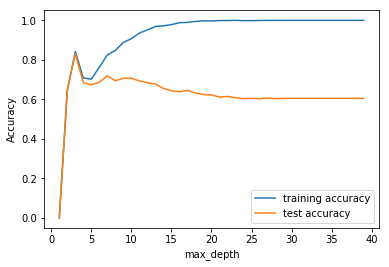

In [176]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [177]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="precision")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [178]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.075207,0.002405,0.684411,0.882384,5,{'min_samples_leaf': 5},6,0.668182,0.886034,0.675799,...,0.701835,0.871767,0.703518,0.888255,0.672727,0.878348,0.005558,0.000480,0.015118,0.006374
1,0.060384,0.002002,0.700788,0.779855,25,{'min_samples_leaf': 25},2,0.677273,0.778835,0.628319,...,0.728205,0.796818,0.740331,0.788438,0.729858,0.772889,0.001723,0.000622,0.042347,0.011994
2,0.057753,0.001814,0.694014,0.752333,45,{'min_samples_leaf': 45},4,0.675556,0.743743,0.672131,...,0.725888,0.728211,0.668317,0.746411,0.728205,0.758398,0.001623,0.000405,0.027072,0.018911
3,0.052551,0.002000,0.700283,0.738863,65,{'min_samples_leaf': 65},3,0.720430,0.765753,0.678756,...,0.711230,0.727833,0.712042,0.742785,0.678947,0.714810,0.001869,0.000012,0.017791,0.017070
4,0.057151,0.003010,0.701589,0.732815,85,{'min_samples_leaf': 85},1,0.699482,0.743836,0.704918,...,0.715976,0.746763,0.693122,0.715507,0.694444,0.725955,0.005108,0.001089,0.008309,0.011517


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


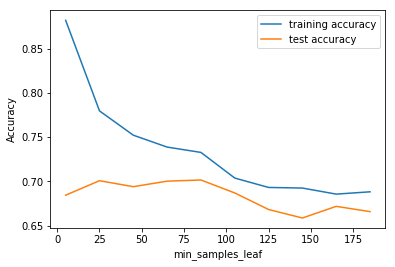

In [179]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [180]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="precision")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [181]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head(10)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.083431,0.002404,0.626353,0.975146,5,{'min_samples_split': 5},10,0.630081,0.973629,0.633333,...,0.654867,0.970244,0.629464,0.976521,0.584000,0.978791,0.003726,0.000487,0.023144,0.002948
1,0.078604,0.002406,0.679780,0.871784,25,{'min_samples_split': 25},8,0.663507,0.884024,0.665138,...,0.688995,0.854626,0.729885,0.880866,0.651376,0.873126,0.004114,0.001004,0.027860,0.010572
2,0.086238,0.002608,0.695613,0.833998,45,{'min_samples_split': 45},4,0.684729,0.853904,0.641350,...,0.690821,0.845789,0.741573,0.834515,0.719626,0.828605,0.002448,0.001211,0.033986,0.016026
3,0.079819,0.002202,0.675712,0.802829,65,{'min_samples_split': 65},9,0.662037,0.801402,0.649351,...,0.694444,0.815545,0.661972,0.788419,0.710784,0.810174,0.008170,0.000393,0.023028,0.009415
4,0.075203,0.002412,0.686901,0.787529,85,{'min_samples_split': 85},6,0.688119,0.819462,0.638211,...,0.656522,0.772678,0.729730,0.794012,0.721951,0.795343,0.006462,0.000812,0.035659,0.021578
5,0.069395,0.002007,0.681185,0.767101,105,{'min_samples_split': 105},7,0.710000,0.798976,0.628571,...,0.659389,0.738943,0.724490,0.774648,0.683486,0.769412,0.001617,0.000002,0.034511,0.020275
6,0.071005,0.002005,0.687144,0.760274,125,{'min_samples_split': 125},5,0.712821,0.804781,0.650442,...,0.656522,0.733405,0.728155,0.758343,0.687783,0.736607,0.003922,0.000014,0.030420,0.025807
7,0.069792,0.002011,0.705273,0.774917,145,{'min_samples_split': 145},3,0.706161,0.777914,0.650224,...,0.707182,0.782904,0.750000,0.802539,0.712821,0.757306,0.002166,0.000011,0.031915,0.017814
8,0.072605,0.002199,0.713143,0.773696,165,{'min_samples_split': 165},1,0.735135,0.800550,0.637066,...,0.725714,0.784341,0.763514,0.832803,0.704301,0.746053,0.005683,0.000387,0.042536,0.044381
9,0.069190,0.002211,0.710902,0.762823,185,{'min_samples_split': 185},2,0.718593,0.764557,0.641129,...,0.714286,0.766484,0.772414,0.831461,0.708108,0.744401,0.001263,0.000399,0.041789,0.040397


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


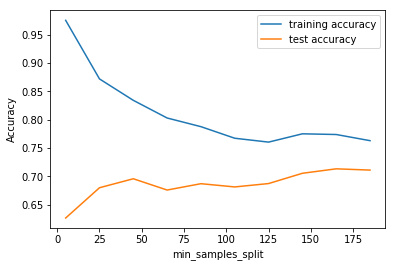

In [182]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [114]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [115]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,rank_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.048931,0.001605,0.935848,0.939813,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.931209,0.940176,0.936640,0.942076,0.935168,0.937195,0.008999,0.000496,0.004853,0.002492
1,0.042518,0.001805,0.935848,0.939813,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",13,...,0.931209,0.940176,0.936640,0.942076,0.935168,0.937195,0.003389,0.000401,0.004853,0.002492
2,0.049130,0.002006,0.934835,0.938835,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.931571,0.939995,0.935554,0.939271,0.932633,0.936923,0.002286,0.000634,0.005448,0.001854
3,0.044511,0.001806,0.934835,0.938835,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",15,...,0.931571,0.939995,0.935554,0.939271,0.932633,0.936923,0.005688,0.001607,0.005448,0.001854
4,0.053348,0.001204,0.938962,0.946528,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.940261,0.947416,0.935192,0.946330,0.941326,0.945973,0.004718,0.000401,0.003174,0.000573
5,0.057763,0.001803,0.938962,0.946528,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",5,...,0.940261,0.947416,0.935192,0.946330,0.941326,0.945973,0.003011,0.000400,0.003174,0.000573
6,0.045515,0.001608,0.937948,0.941188,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",7,...,0.936278,0.943796,0.935554,0.939271,0.936255,0.940995,0.001865,0.000494,0.003538,0.001492
7,0.045921,0.001399,0.937948,0.941188,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",7,...,0.936278,0.943796,0.935554,0.939271,0.936255,0.940995,0.001482,0.000496,0.003538,0.001492
8,0.039116,0.001805,0.936355,0.939740,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",12,...,0.931209,0.938546,0.938450,0.941714,0.935893,0.937557,0.001562,0.000751,0.004943,0.002105
9,0.037520,0.001199,0.936862,0.939740,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",11,...,0.933744,0.938546,0.938450,0.941714,0.935893,0.937557,0.001202,0.000396,0.004499,0.002105


In [116]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9397581637824922
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [183]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=85,
                                  min_samples_split=165)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=85, min_samples_split=165,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [186]:
# accuracy score
clf_gini.precision_score(X_test,y_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'precision_score'

In [185]:
import pickle
# save the model to disk
filename = 'edelweiss_decision_tree_model.sav'
pickle.dump(clf_gini, open(filename, 'wb'))